# Deep Learning für Visual Computing: Übungsblatt 04


**Von: Maximilian Mundt, Radmehr Nouri Inanlou**

**Abgabe: 11.05.2022**

## Importe

In [86]:
import torch
import matplotlib.pyplot as plt

## a) Dataset und Dataloader

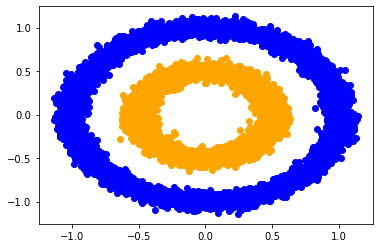

In [1]:
from visualize import show_synthetic_data
from torch.utils.data import DataLoader
from handout import CircelsDataset


dataset = CircelsDataset()
dataloader = DataLoader(dataset, batch_size=64)

show_synthetic_data(dataset.points, dataset.labels)